# Testing Tenor Log Mel Spectrogram with Convolutional Neural Network
## Allowing brass in ensemble

Here we test a convolutional neural network on log Mel spectrogram data extracted from our WAV samles. Each log Mel spectrogram has 96 x 96 = 9,216 features, where 96 is the number of frequency bands, and 96 is the number of time slices (collections of 2,297 raw samples). So this is a lot of data.

Upstream from this notebook we extracted these features and saved them as pickles, then we read all the pickles and aggregated them into a Pandas DataFrame, again saved as a pickle. Finally, with the imported `_tenor_lms_brass_ok` (below) we read from this pickle, filter and reshape the data as needed, and then we scale data using `sklearn.preprocessing.StandardScaler`. At this point, data are ready to read into our notebook.

In this notebook we define, train, and test a CNN with these log Mel spectrogram data as input.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, \
    Conv2D, MaxPooling2D, AveragePooling2D
from keras.metrics import AUC, Recall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _tenor_lmsc_brass_ok import TEST_SIZE, VALIDATION_SIZE, \
    BANDS, TIME_SLICES, master, lmss, data, target
# Note that records are read from pickle, selected, filtered,
# and scaled with `sklearn.preprocessing.StandardScaler` 
# in `_tenor_lmsc_brass_ok.py`.

In [3]:
x_train, x_test, y_train, y_test = \
     train_test_split(data, target,
                      test_size=TEST_SIZE,
                      random_state=RANDOM_SEED)

In [4]:
# Reshape for input to 2D convolutional layer
x_train = x_train.reshape(x_train.shape[0], BANDS, TIME_SLICES, 1)
x_test = x_test.reshape(x_test.shape[0], BANDS, TIME_SLICES, 1)

# Train the CNN
This may take between 5 and 7 minutes per epoch

# Model A

In [ ]:
NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

# https://www.tensorflow.org/tutorials/images/cnn
# https://keras.io/api/layers/convolution_layers/convolution2d/
# https://keras.io/api/layers/pooling_layers/max_pooling2d/
# https://keras.io/api/layers/reshaping_layers/flatten/
# https://keras.io/api/layers/core_layers/dense/
# Architecture based in part on 
#   https://www.kaggle.com/ashirahama/simple-keras-cnn-with-mfcc
model = Sequential()
# Conv2D (from the docs)
# 2D convolution layer (e.g. spatial convolution over images).
# This layer creates a convolution kernel that is convolved with 
# the layer input to produce a tensor of outputs. 
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
# MaxPooling2D (from the docs)
# "Downsamples the input representation by taking the maximum value over the 
# window defined by pool_size for each dimension along the features axis. 
# The window is shifted by strides in each dimension. The resulting output 
# when using "valid" padding option has a shape (number of rows or columns) 
# of: output_shape = (input_shape - pool_size + 1) / strides)""
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())  # Flattens the input. Does not affect the batch size.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
# DON'T RE-RUN .... YET
NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())  # Flattens the input. Does not affect the batch size.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
# DON'T RE-RUN
NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())  # Flattens the input. Does not affect the batch size.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# DON'T RE-RUN
NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4375))  # 28
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# DON'T RE-RUN
NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4375))  # 28
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model B

In [ ]:
NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(72, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4375))  # 28
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model C

In [ ]:
NUM_EPOCHS = 6
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(72, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(108, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(108, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(54, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# DON'T RE-RUN
NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

# 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 
# 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 
# 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 
# 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271
model = Sequential()
model.add(Conv2D(31, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(47, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(71, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(127, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(127, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(53, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model D

In [9]:
NUM_EPOCHS = 9
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(72, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

Train on 4276 samples, validate on 1070 samples
Epoch 1/9
4276/4276 [==============================] - 456s 107ms/step - loss: 0.6220 - recall: 0.7088 - accuracy: 0.7109 - val_loss: 0.5378 - val_recall: 0.6180 - val_accuracy: 0.7645
Epoch 2/9
4276/4276 [==============================] - 441s 103ms/step - loss: 0.4083 - recall: 0.8034 - accuracy: 0.8312 - val_loss: 0.3919 - val_recall: 0.8388 - val_accuracy: 0.8252
Epoch 3/9
4276/4276 [==============================] - 450s 105ms/step - loss: 0.3192 - recall: 0.8449 - accuracy: 0.8653 - val_loss: 0.4172 - val_recall: 0.8311 - val_accuracy: 0.8355
Epoch 4/9
4276/4276 [==============================] - 474s 111ms/step - loss: 0.2438 - recall: 0.8859 - accuracy: 0.9022 - val_loss: 0.4279 - val_recall: 0.7697 - val_accuracy: 0.8467
Epoch 5/9
4276/4276 [==============================] - 483s 113ms/step - loss: 0.1954 - recall: 0.9137 - accuracy: 0.9249 - val_loss: 0.4802 - val_recall: 0.8061 - val_accuracy: 0.8533
Epoch 6/9
4276/4276 [======

In [10]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

1337/1337 [==============================] - 30s 23ms/step
Recall: 84.25
Accuracy: 86.01


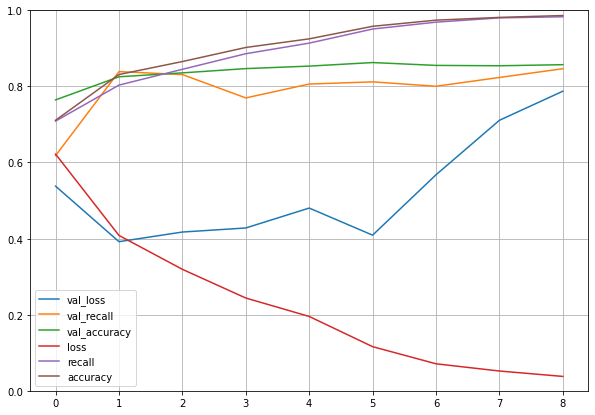

In [11]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.save('./data/keras_models/tenor_cnn_brass_ok_D.h5')

# Model E

In [ ]:
NUM_EPOCHS = 6
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))  # If strides not set it defaults to pool size. OK.
model.add(Dropout(0.25))
model.add(Flatten())  # Flattens the input. Does not affect the batch size.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# DO NOT RE-RUN

NUM_EPOCHS = 3
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(72, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # <<< Only change from model D
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

In [ ]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

In [ ]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model F

In [6]:
NUM_EPOCHS = 9
BATCH_SIZE = 32
INPUT_SHAPE = (BANDS, TIME_SLICES, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2, 2)))  # <<< Only change from model D
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(72, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)

4276/4276 [==============================] - 125s 29ms/step - loss: 0.3460 - recall: 0.8424 - accuracy: 0.8527 - val_loss: 0.3727 - val_recall: 0.8292 - val_accuracy: 0.8411
Epoch 4/9
4276/4276 [==============================] - 122s 28ms/step - loss: 0.2956 - recall: 0.8785 - accuracy: 0.8828 - val_loss: 0.4774 - val_recall: 0.6910 - val_accuracy: 0.8187
Epoch 5/9
4276/4276 [==============================] - 111s 26ms/step - loss: 0.2512 - recall: 0.8868 - accuracy: 0.8943 - val_loss: 0.3834 - val_recall: 0.7946 - val_accuracy: 0.8654
Epoch 6/9
4276/4276 [==============================] - 119s 28ms/step - loss: 0.2218 - recall: 0.9049 - accuracy: 0.9093 - val_loss: 0.3725 - val_recall: 0.8330 - val_accuracy: 0.8645
Epoch 7/9
4276/4276 [==============================] - 125s 29ms/step - loss: 0.1959 - recall: 0.9132 - accuracy: 0.9193 - val_loss: 0.3727 - val_recall: 0.9117 - val_accuracy: 0.8290
Epoch 8/9
4276/4276 [==============================] - 123s 29ms/step - loss: 0.1658 - rec

In [7]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

1337/1337 [==============================] - 8s 6ms/step
Recall: 83.33
Accuracy: 87.21


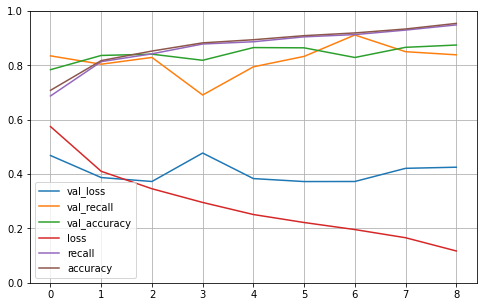

In [8]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(9, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.save('./keras_models/tenor_brass_ok_cnn_F.h5')